In [1]:
import numpy as np
import pandas as pd
import geopandas

In [2]:
raw_data = 'input/uber-raw-data-jul14.csv'
df = pd.read_csv(raw_data)
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%m/%d/%Y %H:%M:%S')


In [3]:
# import libraries
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
# import street map
street_map = gpd.read_file('Map/geo_export_87692aa8-c2d6-4db0-9041-100a186e61fc.shp')

In [4]:
import seaborn as sns


d:\academics\software\python\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


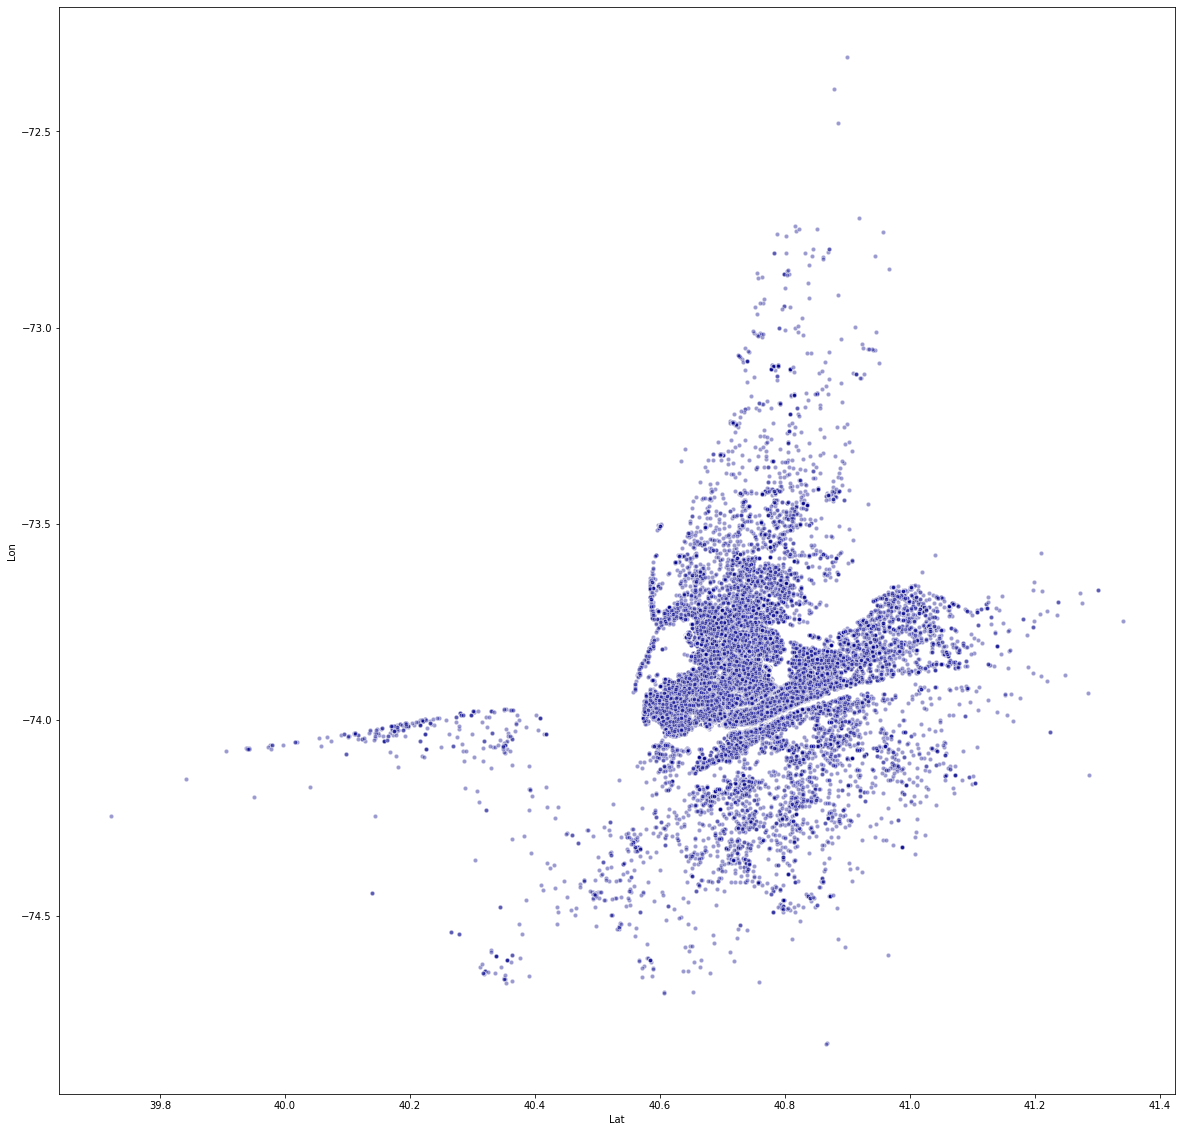

In [5]:
ax1 = df.plot.scatter(x='Lat',
                      y='Lon',
                      c='DarkBlue', edgecolor="w",
                     alpha=0.4,figsize=(20,20))

No handles with labels found to put in legend.


Text(-8.075000000000003, 0.5, 'Value of Y')

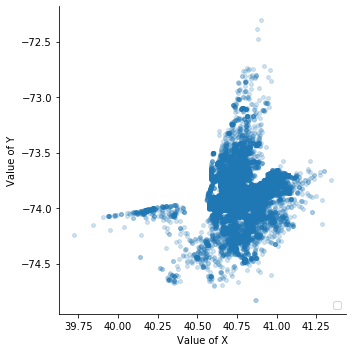

In [6]:
sns.lmplot( x="Lat", y="Lon", data=df, fit_reg=False, legend=False, palette="Accent", scatter_kws={"alpha":0.2,"s":15} )
 
# Legend
plt.legend(loc='lower right', markerscale=2)
 
# titles
plt.xlabel('Value of X')
plt.ylabel('Value of Y')


In [7]:
sorted_df = df.sort_values(by=['Lon', 'Lat']).sample(100000)

In [8]:
sorted_df.count()

Date/Time    100000
Lat          100000
Lon          100000
Base         100000
dtype: int64

In [9]:
total_bins = int(len(sorted_df)/10)

In [10]:
import datetime as dt


In [11]:
sorted_df['label']=sorted_df.index

In [12]:
indx_coorddf = sorted_df[['label', 'Lon', 'Lat']]

In [13]:
sorted_df.head()

,Date/Time,Lat,Lon,Base,label
8703,2014-07-10 14:23:00,40.7799,-73.9583,B02512,8703
655430,2014-07-12 10:08:00,40.7439,-73.9739,B02682,655430
563844,2014-07-30 00:45:00,40.7597,-73.9779,B02617,563844
145295,2014-07-15 20:52:00,40.7310,-73.9897,B02598,145295
116240,2014-07-12 15:24:00,40.7758,-73.9548,B02598,116240


In [14]:
sorted_df['epoch'] = (sorted_df['Date/Time'] - dt.datetime(1970,1,1)).dt.total_seconds()

In [15]:
msk = np.random.rand(len(sorted_df)) < 0.8

In [16]:
train_x = sorted_df[msk][['epoch', 'Lat', 'Lon']]

In [17]:
train_y = sorted_df[msk][['label']]

In [18]:
test_x = sorted_df[~msk][['epoch', 'Lat', 'Lon']]

In [19]:
test_y = sorted_df[~msk][['label']]

In [20]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [21]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

In [22]:
regr.fit(train_x, train_y.values.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])